In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
from subprocess import check_output
print(check_output(["ls", "../../resources/prices"]).decode("utf8"))

coin_Aave.csv
coin_BinanceCoin.csv
coin_Bitcoin.csv
coin_Cardano.csv
coin_ChainLink.csv
coin_Cosmos.csv
coin_CryptocomCoin.csv
coin_Dogecoin.csv
coin_EOS.csv
coin_Ethereum.csv
coin_Iota.csv
coin_Litecoin.csv
coin_Monero.csv
coin_NEM.csv
coin_Polkadot.csv
coin_Solana.csv
coin_Stellar.csv
coin_Tether.csv
coin_Tron.csv
coin_USDCoin.csv
coin_Uniswap.csv
coin_WrappedBitcoin.csv
coin_XRP.csv



## Load and inspect data

In [3]:
dot_df = pd.read_csv(Path('../../resources/prices/coin_Polkadot.csv'), index_col='SNo')
dot_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Polkadot,DOT,2020-08-21 23:59:59,3.090093,2.730919,2.896923,2.875028,4.931314e+07,0.000000e+00
2,Polkadot,DOT,2020-08-22 23:59:59,4.510613,2.816762,2.878570,4.484690,4.858011e+08,0.000000e+00
3,Polkadot,DOT,2020-08-23 23:59:59,4.487058,3.716271,4.487058,3.967066,3.207495e+08,0.000000e+00
4,Polkadot,DOT,2020-08-24 23:59:59,4.783158,3.812670,3.987413,4.602614,4.076902e+08,0.000000e+00
5,Polkadot,DOT,2020-08-25 23:59:59,5.760775,4.501223,4.584953,5.523393,8.988475e+08,0.000000e+00
...,...,...,...,...,...,...,...,...,...
187,Polkadot,DOT,2021-02-23 23:59:59,37.714168,26.757643,37.664930,34.300774,7.502138e+09,3.129232e+10
188,Polkadot,DOT,2021-02-24 23:59:59,36.752569,31.975445,34.330861,33.633546,4.724242e+09,3.070688e+10
189,Polkadot,DOT,2021-02-25 23:59:59,35.079181,31.059273,33.621172,31.080660,3.470267e+09,2.838641e+10


In [4]:
dot_df['Date'] = pd.to_datetime(dot_df['Date']).dt.date
dot_df['Date'] = pd.to_datetime(dot_df['Date'])
dot_df['Spread'] = dot_df.High - dot_df.Low
dot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 1 to 191
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       191 non-null    object        
 1   Symbol     191 non-null    object        
 2   Date       191 non-null    datetime64[ns]
 3   High       191 non-null    float64       
 4   Low        191 non-null    float64       
 5   Open       191 non-null    float64       
 6   Close      191 non-null    float64       
 7   Volume     191 non-null    float64       
 8   Marketcap  191 non-null    float64       
 9   Spread     191 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 16.4+ KB


## Plot the closing value of XMR over time

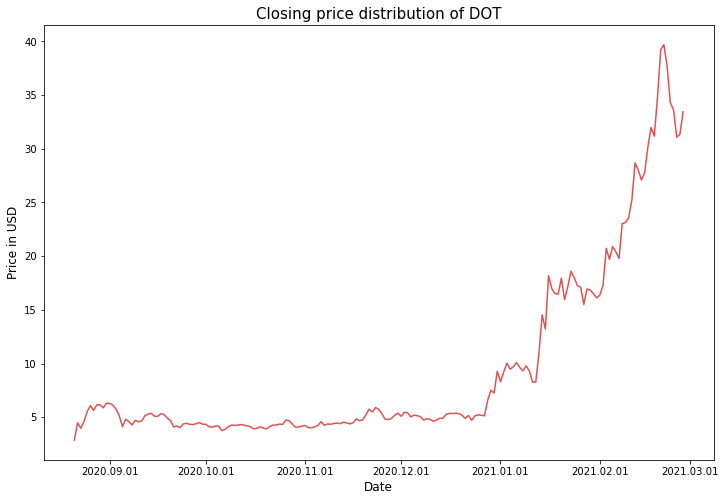

In [5]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = dot_df.Close.values, x=dot_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = dot_df.Close.values, x=dot_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of DOT", fontsize=15)
plt.show()

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

dot_df['Date_mpl'] = dot_df['Date'].apply(lambda x: mdates.date2num(x))

temp_dot_df = dot_df.copy(deep=False)
temp_dot_df = temp_dot_df.set_index(['Date'])
temp_dot_df = temp_dot_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_dot_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2020-08-21,3.090093,2.730919,2.896923,2.875028,4.931314e+07,18495.0
2020-08-22,4.510613,2.816762,2.878570,4.484690,4.858011e+08,18496.0
2020-08-23,4.487058,3.716271,4.487058,3.967066,3.207495e+08,18497.0
2020-08-24,4.783158,3.812670,3.987413,4.602614,4.076902e+08,18498.0
2020-08-25,5.760775,4.501223,4.584953,5.523393,8.988475e+08,18499.0
...,...,...,...,...,...,...
2021-02-23,37.714168,26.757643,37.664930,34.300774,7.502138e+09,18681.0
2021-02-24,36.752569,31.975445,34.330861,33.633546,4.724242e+09,18682.0
2021-02-25,35.079181,31.059273,33.621172,31.080660,3.470267e+09,18683.0


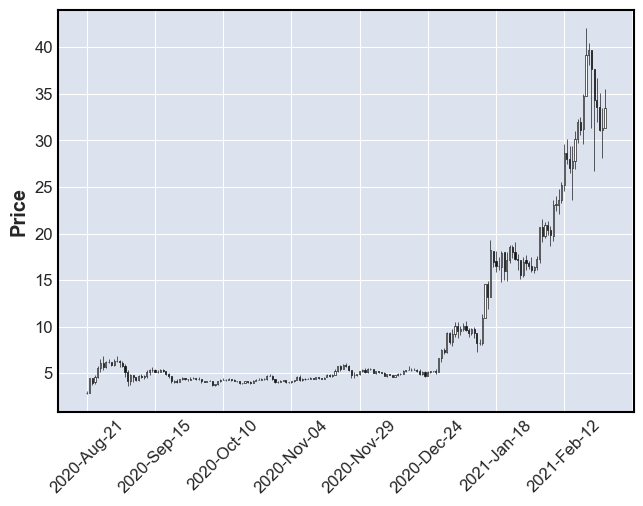

In [7]:
mpf.plot(temp_dot_df, type='candle')

## Price prediction

In [8]:
from fbprophet import Prophet

In [9]:
INPUT_FILE = "coin_Polkadot.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]

m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
216,2021-03-25 23:59:59,47.794129,45.197791,49.987819
217,2021-03-26 23:59:59,48.341881,45.814311,50.564734
218,2021-03-27 23:59:59,49.202363,46.572281,51.415422
219,2021-03-28 23:59:59,49.510652,47.092171,51.983153
220,2021-03-29 23:59:59,49.937417,47.306454,52.385318


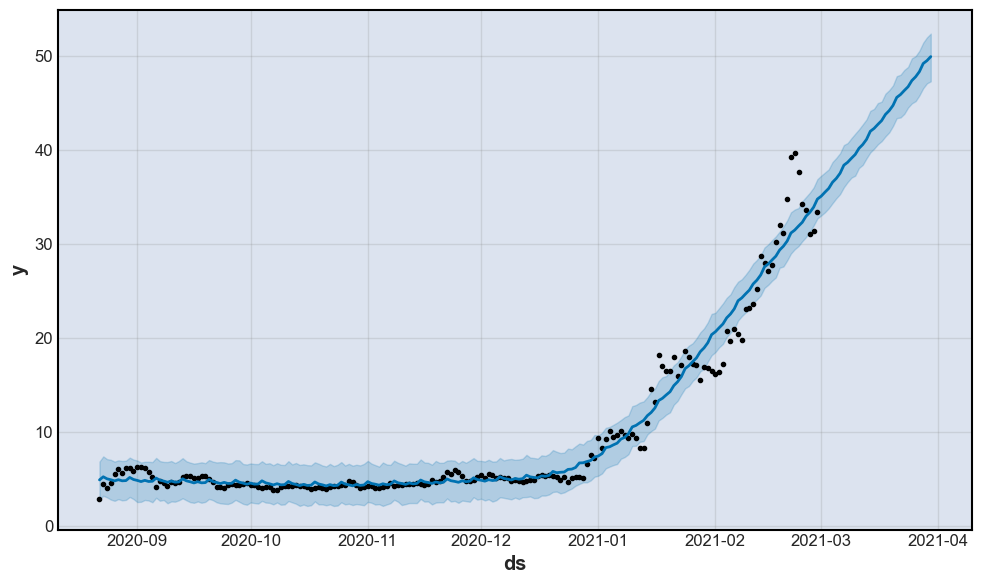

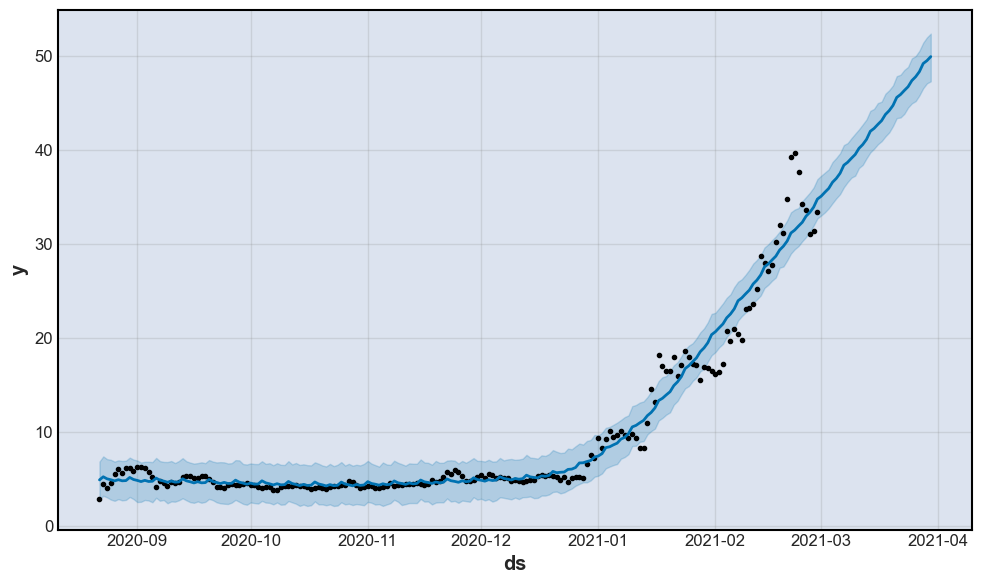

In [10]:
m.plot(forecast)

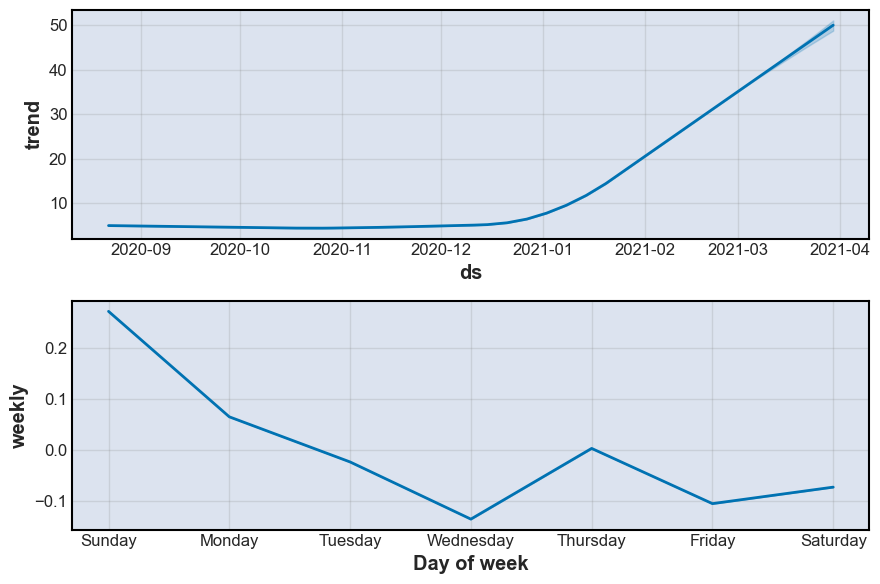

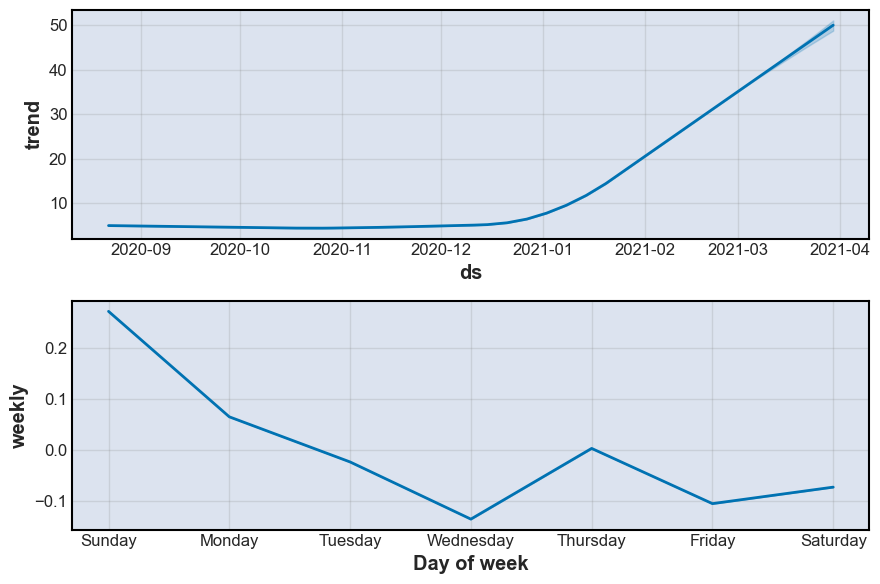

In [11]:
m.plot_components(forecast)